<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---
# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) 데이터를 전처리 하겠습니다.
- 데이터를 불러오세요.(read_csv 사용)
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인하세요.
  - id가 동일하면 중복 샘플입니다. id로 중복 여부를 확인하세요.
- 이후 id 칼럼은 drop하세요.
- **중복된 샘플을 제거하고 남은 샘플의 수를 제출하세요.**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [ ]:
# 데이터 확인
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
duple = df['id'].duplicated()
duple_index = np.where(duple)

# 개수 및 인덱스no 확인
print("중복된 샘플 :",len(duple_index[0]),"개" )
print("중복된 샘플의 인덱스 no :", duple_index[0])

# 중복값 제거 - 나중에 나오는 중복값을 제거
df.drop_duplicates(keep="first", inplace=True)
df.shape

중복된 샘플 : 0 개
중복된 샘플의 인덱스 no : []


(70000, 13)

In [ ]:
# id컬럼 삭제
df = df.drop("id", axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# 결측치 확인 -> 없음
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- 훈련과 테스트 데이터로 나누어 줍니다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련 데이터를 훈련과 검증 데이터로 나누어 줍니다(train_test_split 사용, train/validation = 80/20)
- **검증 데이터(X_val)의 개수를 제출하세요.**

In [ ]:
# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2, random_state=2)

print(train.shape, test.shape)

(56000, 12) (14000, 12)


In [ ]:
# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train, val = train_test_split(train, test_size=0.2, random_state=2)

print(train.shape, val.shape)   # 검증용 데이터 : 11,200개

(44800, 12) (11200, 12)


### 3) 기준모델을 설정하세요.
- 우리가 예측하고자 하는 column은 `cardio`(Presence or absence of cardiovascular disease)입니다.
- 모델을 만들기 전에 최빈 클래스로 기준모델을 설정합니다.
- **훈련 데이터에 대하여 기준모델 정확도를 제출하세요.**

In [ ]:
# 타겟 및 범주 확인
target = "cardio"

# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train[target]
X_train = train.drop(target, axis=1)
y_val = val[target]
X_val = val.drop(target, axis=1)

# 데이터의 volume 확인
print("훈련용 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))

훈련용 데이터 확인 / features: (44800, 11), target(44800,)
검증용 데이터 확인 / features: (11200, 11), target(11200,)


In [ ]:
# 훈련용 데이터의 target을 분리한 후 탐색하기
print('y_train의 target 데이터 확인')
print(y_train.value_counts(normalize=True))

# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 최빈값을 반복하여 리스트에 저장. 기준모델로 사용
y_pred = [major] * len(y_train)

# 기준모델과 훈련용 데이터의 타깃 데이터를 비교한 후 정확도 비교
from sklearn.metrics import accuracy_score
print("\n기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, y_pred))

y_train의 target 데이터 확인
1    0.500871
0    0.499129
Name: cardio, dtype: float64

기준모델과 훈련용 데이터 학습 정확도 : 0.5008705357142857


### 4) 수치형 특성 값들을 표준화 하세요.
- `StandardScaler()`를 사용해서 수치형 특성만 표준화 하세요.

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
scaler = StandardScaler()

# gender 특성을 제외한 수치형 특성 저장
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# 훈련용 데이터 fit_transform
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# 검증용 데이터 transform
X_val[numeric_features] = scaler.transform(X_val[numeric_features])

In [ ]:
scaler.feature_names_in_

array(['age', 'height', 'weight', 'ap_hi', 'ap_lo'], dtype=object)

In [ ]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
7808,0.376890,1,-0.890528,-0.985745,-0.054656,-0.087151,3,3,0,0,1
35103,-0.524700,2,1.533878,-0.707800,-0.114516,-0.188405,1,1,1,0,0
383,0.020230,1,-2.102731,-2.305985,-0.294095,-0.239033,1,1,0,0,1
68839,-0.240671,1,-0.405647,-1.402663,-0.114516,-0.137778,1,1,0,0,0
15529,-0.216325,1,-0.526867,-0.916259,0.124923,0.014104,2,2,0,0,1


### 5) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요.
- `category_encoders`를 사용해서 `gender` 특성만 원핫인코딩 하세요. 
  - `use_cat_names=True`로 설정합니다. 
  - `cols`를 사용하여 인코딩을 적용할 특성을 설정할 수 있습니다.

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 743 kB/s 


In [ ]:
# 원핫인코딩
from category_encoders import OneHotEncoder

# 인코딩 객체 생성, gender 컬럼만 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols="gender")

# 훈련용 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증용 데이터 transform
X_val_encoded = encoder.transform(X_val)

### 6) 모델 학습
- Logistic Regression 모델을 인코딩된 데이터로 학습합니다. 
  - `max_iter=1000`으로 설정합니다. 
- **검증세트 정확도를 제출하세요.**

In [ ]:
# 로지스틱 회귀모델 생성 및 훈련
# 객체 생성
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)

# 모델 훈련 : 인코딩 완료한 데이터 사용 (X_train_encoded)
logistic.fit(X_train_encoded, y_train)

# 검증세트의 정확도 측정 : X_val_encoded, y_val사용, score 속성 사용
print('검증세트 정확도', logistic.score(X_val_encoded, y_val))

검증세트 정확도 0.72625


### 7) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요.
- **테스트 세트 정확도를 제출하세요. (0.712 이상)**

In [ ]:
# 테스트 데이터 features와 target 분리
y_test = test[target]
X_test = test.drop(target, axis=1)

# 확인
print("테스트용 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

테스트용 데이터 확인 / features: (14000, 11), target(14000,)


In [ ]:
# "최적화"라고 한다면 정확히 어떤 작업을 말하는 것일까? 다양하게 생각해보자.
# 수업 내용엔 없었지만 하이퍼파라미터(C) 조정
# 객체 생성 & 모델 훈련
logistic_001 = LogisticRegression(C=0.01, max_iter=1000).fit(X_train_encoded, y_train)
logistic_01 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train_encoded, y_train)
logistic = LogisticRegression(max_iter=1000).fit(X_train_encoded, y_train)
logistic_1 = LogisticRegression(C=1, max_iter=1000).fit(X_train_encoded, y_train)
logistic_10 = LogisticRegression(C=10, max_iter=1000).fit(X_train_encoded, y_train)


# 검증 데이터셋으로 정확도 측정
print('C=0.01 정확도', logistic_001.score(X_val_encoded, y_val))
print('C=0.1 정확도', logistic_01.score(X_val_encoded, y_val))
print('C=default 정확도', logistic.score(X_val_encoded, y_val))
print('C=1 정확도', logistic_1.score(X_val_encoded, y_val))
print('C=10 정확도', logistic_10.score(X_val_encoded, y_val))

C=0.01 정확도 0.6974107142857143
C=0.1 정확도 0.7219642857142857
C=default 정확도 0.72625
C=1 정확도 0.72625
C=10 정확도 0.726875


In [ ]:
# test데이터의 gender 원핫인코딩
X_test_encoded = encoder.transform(X_test)

# test데이터 표준화
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# test데이터를 가지고 예측 (1회) -> 정확도 UP
print('테스트 세트 정확도', logistic_10.score(X_test_encoded, y_test))

테스트 세트 정확도 0.7246428571428571


## 🔥 도전과제

### 8) EDA를 추가적으로 수행하고 아래 질문에 대한 본인만의 근거와 수행결과를 리포트해 보시고 서로 논해 보세요.
- 새로운 특성을 만들 수 있다면, 어떤 특성공학을 해 볼 수 있을까요?
- 아웃라이어가 있는 특성이 있다면, 어떤 기준으로 제거할 수 있을까요?
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까요? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까요?
- 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까요?

In [ ]:
# 새로운 특성 1 : 키와 몸무게를 가지고 BMI를 계산할 수 있다.
# BMI 계산 : 체중(kg)/신장(m)제곱

df["BMI"] = round(df["weight"]/pow(df["height"]*0.01, 2), 2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [ ]:
# 새로운 특성 2 : age를 days -> years 로 바꾸어서 가독성을 높일 수 있다.
df["age_year"] = round(df["age"]/365, -1).astype("int")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50


In [ ]:
# 새로운 특성 3 : 혈압 관련 컬럼을 활용해서 평균혈압을 구할 수 있다.
# 평균 혈압 계산법 : (수축기혈압 - 이완기혈압)*1/3 + 이완기혈압
ap_avg= (df["ap_hi"]-df["ap_lo"])*1/3 + df["ap_lo"]
df["ap_avg"] = round(ap_avg, 2)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33


In [ ]:
# 원활한 반복문 구동을 위한 인덱스 재설정
df.reset_index(drop=True, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93,50,93.33
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47,60,106.67
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35,50,120.00
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.10,60,98.33


In [ ]:
# 새로운 특성 4 : 혈압 관련 컬럼을 활용해서 고/저혈압을 판단 할 수 있다.
# 고혈압 (high) : 수축기혈압 140이상 or 이완기혈압 90이상  
# 고혈압위험군 (high_risk) : 수축기혈압 120 이상 or 이완기혈압 80이상 
# 정상혈압(nomal) : 수축기혈압 120미만 and 이완기혈압 80미만
# 저혈압(low) : 수축기혈압 90이하 or 이완기혈압 60이하 

# 혈압 증상 기록을 위한 빈 컬럼 마련
df["ap_type"] = " "

# 수축기혈압(ap_hi)과 이완기혈압(ap_lo) 수치를 if문 조건으로 비교하여 구분

for index in range(len(df)):
  ap_hi = df["ap_hi"][index]
  ap_lo = df["ap_lo"][index]

  if ap_hi >= 140 or ap_lo>= 90:
    df["ap_type"][index] = "high"

  elif ap_hi <= 90 or ap_lo <= 60:
    df["ap_type"][index] = "low"

  elif ap_hi >= 120 or ap_lo >= 80:
    df["ap_type"][index] = "high_risk"

  elif ap_hi < 120 and ap_lo < 80:
    df["ap_type"][index] = "normal"

  else:
    df["ap_type"][index] = "ambi"

# 확인
df.head(20)

/var/folders/gc/sh4qfh4j1c764lzmryjwxrww0000gp/T/ipykernel_31096/565076690.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_type"][index] = "high_risk"
/var/folders/gc/sh4qfh4j1c764lzmryjwxrww0000gp/T/ipykernel_31096/565076690.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ap_type"][index] = "high"
/var/folders/gc/sh4qfh4j1c764lzmryjwxrww0000gp/T/ipykernel_31096/565076690.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg,ap_type
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00,high_risk
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67,high
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00,high_risk
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67,high
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33,low
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60,93.33,high_risk
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60,96.67,high_risk
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.98,60,103.33,high
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.44,50,83.33,normal
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.28,50,76.67,low


In [ ]:
df["ap_type"].value_counts()

high_risk    34993
high         24705
normal        7234
low           3068
Name: ap_type, dtype: int64

In [ ]:
# 컬럼 재정렬
df_clean_1 = df[["age", "age_year", "gender", "height", "weight", "BMI", "ap_hi", "ap_lo", "ap_avg", "ap_type", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]

In [ ]:
# feature 탐색 1. 나이(age, age_year)
df_clean_1[["age", "age_year"]].describe()

,age,age_year
count,70000.000000,70000.000000
mean,19468.865814,52.997000
std,2467.251667,7.096488
min,10798.000000,30.000000
25%,17664.000000,50.000000
50%,19703.000000,50.000000
75%,21327.000000,60.000000
max,23713.000000,60.000000


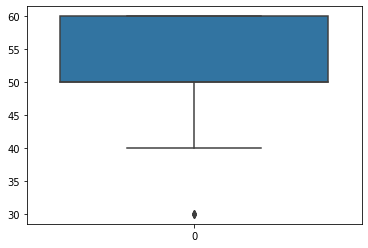

In [ ]:
# 나이를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["age_year"])
plt.show()

In [ ]:
# 나이 outlier제거
df_clean_1 = df_clean_1[df["age_year"]>40]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69996,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69997,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69998,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [ ]:
# feature 탐색 2. BMI
df_clean_1[["height", "weight", "BMI"]].describe()

,height,weight,BMI
count,59728.000000,59728.000000,59728.000000
mean,164.177756,74.499171,27.726416
std,8.166352,14.319810,6.032241
min,55.000000,10.000000,3.470000
25%,159.000000,65.000000,23.920000
50%,164.000000,72.000000,26.570000
75%,169.000000,82.000000,30.470000
max,250.000000,200.000000,298.670000


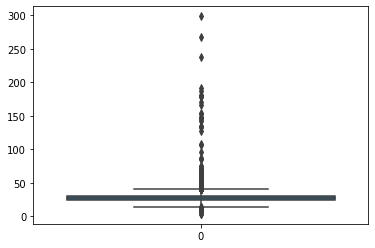

In [ ]:
# BMI를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["BMI"])
plt.show()

In [ ]:
# BMI의 이상치 : 데이터를 확인하여 이상치 제거 필요
df_clean_1[df_clean_1["BMI"]>=60]

# 신장 64cm? 65cm? 기입 오류로 보임.

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
224,21800,60,2,76,55.0,95.22,120,80,93.33,high_risk,1,1,0,0,1,0
389,16718,50,2,165,169.0,62.08,120,80,93.33,high_risk,1,1,0,0,1,0
2458,23646,60,2,159,165.0,65.27,130,70,90.00,high_risk,1,1,0,0,0,0
3313,17545,50,1,155,155.0,64.52,160,1000,720.00,high,1,1,0,0,1,1
6153,20990,60,1,122,161.0,108.17,120,80,93.33,high_risk,1,1,0,0,1,1
8171,17646,50,2,97,170.0,180.68,160,100,120.00,high,1,1,1,0,1,1
8677,19698,50,2,119,89.0,62.85,160,90,113.33,high,1,1,0,0,1,1
11230,18307,50,1,110,90.0,74.38,120,80,93.33,high_risk,1,1,0,0,1,0
12435,22077,60,1,137,161.0,85.78,150,100,116.67,high,2,1,0,0,0,1
12770,19594,50,1,75,168.0,298.67,120,80,93.33,high_risk,1,1,1,0,1,1


In [ ]:
# 신장 값이 100 (= 1m) 이하는 모두 삭제
df_clean_1 = df_clean_1[df_clean_1["height"]>100]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [ ]:
# feature 탐색 3.혈압 관련 feature 확인
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59705.000000,59705.000000,59705.000000
mean,129.939084,97.818072,108.524164
std,156.149763,192.018603,138.941021
min,-150.000000,-70.000000,-41.670000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.000000
max,16020.000000,11000.000000,7400.000000


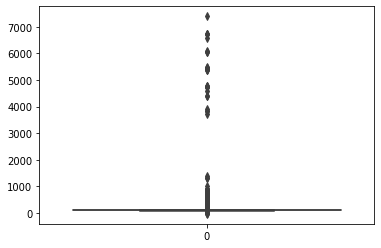

In [ ]:
# 혈압이 마이너스값일 수 있을까?
# 수축기,이완기 혈압 컬럼의 최대값이 10,000 이상이 된다?
# 분명 잘못된 데이터이다.


# 평균 혈압 수치를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["ap_avg"])
plt.show()

In [ ]:
# 혈압 데이터가 음수인 row - 수축기혈압 확인
df_clean_1[df_clean_1["ap_hi"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
16021,22108,60,2,161,90.0,34.72,-115,70,8.33,low,1,1,0,0,1,0
23988,18301,50,1,162,74.0,28.20,-140,90,13.33,high,1,1,0,0,1,1
35040,23325,60,2,168,59.0,20.90,-150,80,3.33,low,1,1,0,0,1,1
46627,23646,60,2,160,59.0,23.05,-120,80,13.33,low,1,1,0,0,0,0


In [ ]:
# 혈압 데이터가 음수인 row 확인 - 이완기혈압 확인
df_clean_1[df_clean_1["ap_lo"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
2014,22712,60,2,167,59.0,21.16,906,0,302.00,high,1,1,0,0,1,0
16459,20457,60,1,156,50.0,20.55,138,0,46.00,low,3,1,0,0,1,1
17381,18226,50,1,164,78.0,29.00,138,0,46.00,low,1,1,0,0,1,0
22923,21182,60,2,166,68.0,24.68,149,0,49.67,high,1,1,0,0,1,1
25454,17952,50,2,176,73.0,23.57,12,0,4.00,low,1,1,0,0,1,0
27686,23396,60,2,180,73.0,22.53,140,0,46.67,high,1,1,1,1,1,1
38370,23208,60,2,170,81.0,28.03,148,0,49.33,high,1,1,0,0,1,0
40330,20322,60,1,162,50.0,19.05,309,0,103.00,high,1,1,0,0,1,0
41505,20970,60,1,154,41.0,17.29,806,0,268.67,high,1,1,0,0,1,0
42397,17988,50,2,176,69.0,22.28,906,0,302.00,high,1,1,0,0,1,0


In [ ]:
# 음수값 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>0]
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>0]

df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59684.000000,59684.000000,59684.000000
mean,129.908568,97.848301,108.534145
std,156.037048,192.044408,138.949873
min,1.000000,1.000000,12.000000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.330000
max,16020.000000,11000.000000,7400.000000


In [ ]:
# 수축기 혈압이 이완기 혈압보다 낮을 수는 없다.
# 수축기 혈압이 이완기 혈압보다 낮은 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"] > df_clean_1["ap_lo"]]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [ ]:
# 지나치게 높은/낮은 수축기혈압도 말이 안 됨. (몇 천, 몇 만)
# 수축기 혈압이 400 이상인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]<400]

# 수축기 혈압이 50 이하인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>50]

df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [ ]:
# 지나치게 낮은 이완기 혈압도 말이 안 됨
# 조사에 따르면 이완기 혈압이 30미만인 경우는 전체 인구의 0.22%.
# 여기서는 20 이하인 row 삭제

df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>20]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69996,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69997,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69998,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [ ]:
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,58555.000000,58555.000000,58555.000000
mean,127.743404,81.799044,97.112899
std,16.747218,9.391318,11.003185
min,70.000000,30.000000,53.330000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,103.330000
max,240.000000,182.000000,186.670000


In [ ]:
# 데이터 정제 후 인덱스 재정렬
df_clean = df_clean_1.reset_index(drop=True)
df_clean

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58550,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
58551,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
58552,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
58553,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [ ]:
# 모델 학습을 위해 데이터셋 나누기

# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
train_clean, test_clean = train_test_split(df_clean,test_size=0.2, random_state=2)

# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train_clean, val_clean = train_test_split(train_clean, test_size=0.2)

# 타겟 및 범주 확인
target = "cardio"

# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train_clean[target]
X_train = train_clean.drop(target, axis=1)
y_val = val_clean[target]
X_val = val_clean.drop(target, axis=1)
y_test = test_clean[target]
X_test = test_clean.drop(target, axis=1)

# 데이터의 volume 확인
print("훈련용 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

훈련용 데이터 확인 / features: (37475, 15), target(37475,)
검증용 데이터 확인 / features: (9369, 15), target(9369,)
검증용 데이터 확인 / features: (11711, 15), target(11711,)


In [ ]:
# 기준모델 생성 및 평가 - 로지스틱 모델 성능 비교를 위한 작업

# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 최빈값을 반복하여 리스트에 저장. 기준모델로 사용
y_pred = [major] * len(y_train)

# 기준모델과 훈련용 데이터의 타깃 데이터를 비교한 후 정확도 비교
print("기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, y_pred))

기준모델과 훈련용 데이터 학습 정확도 : 0.5285923949299534


In [ ]:
# categorical feature를 인코딩

# 인코딩 객체 생성, gender, ap_type 컬럼 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols=["gender", "ap_type"])

# 훈련용 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증용 데이터 : transform
X_val_encoded = encoder.transform(X_val)

# 테스트용 데이터 : trainform
X_test_encoded = encoder.transform(X_test)

In [ ]:
X_train_encoded

,age,age_year,gender_1.0,gender_2.0,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type_high_risk,ap_type_high,ap_type_normal,ap_type_low,cholesterol,gluc,smoke,alco,active
53889,18178,50,1,0,165,69.0,25.34,120,80,93.33,1,0,0,0,1,1,0,0,1
43800,17681,50,0,1,167,65.0,23.31,130,80,96.67,1,0,0,0,1,2,0,0,1
3439,19568,50,1,0,167,69.0,24.74,120,80,93.33,1,0,0,0,1,1,0,0,1
20170,18080,50,0,1,170,67.0,23.18,140,70,93.33,0,1,0,0,1,1,0,0,1
3690,21918,60,1,0,174,75.0,24.77,120,80,93.33,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7514,18364,50,1,0,165,65.0,23.88,120,80,93.33,1,0,0,0,1,1,0,0,0
14332,16799,50,1,0,158,60.0,24.03,90,60,70.00,0,0,0,1,1,1,0,0,1
52910,23256,60,0,1,168,75.0,26.57,150,90,110.00,0,1,0,0,3,3,0,0,1
26045,18170,50,1,0,166,120.0,43.55,120,80,93.33,1,0,0,0,1,1,0,0,0


In [ ]:
# feature scaling - 데이터의 범주가 너무 제각각임 / 이상치 정제 완료
# 1) 정규화를 통해 스케일링을 진행하면 어떻게 될까?
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler_normalize = MinMaxScaler()

# feature 스케일링 진행
X_train_scaled_N = scaler_normalize.fit_transform(X_train_encoded)
X_val_scaled_N = scaler_normalize.transform(X_val_encoded)
X_test_scaled_N = scaler_normalize.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_N, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_N,y_val))

검증세트 정확도: 0.712989646707226


In [ ]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_N, y_test))

테스트 세트 정확도 0.7155665613525745


In [ ]:
# 표준화 스케일링을 하면 어떻게 될까?

# StandardScaler객체 생성
scaler_standard = StandardScaler()

# feature 스케일링 진행
X_train_scaled_S = scaler_standard.fit_transform(X_train_encoded)
X_val_scaled_S = scaler_standard.transform(X_val_encoded)
X_test_scaled_S = scaler_standard.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_S, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_S,y_val))

검증세트 정확도: 0.712349236844914


In [ ]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_S, y_test))

테스트 세트 정확도 0.7158227307659465
